In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
m6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')
nrtmodis = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')
rain = pd.read_csv(r'..\Data\Clean\rain.csv')
wind = pd.read_csv(r'..\Data\Clean\wind.csv')

In [3]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])

In [18]:
m6.acq_date

0         2000-11-01
1         2000-11-01
2         2000-11-01
3         2000-11-01
4         2000-11-01
             ...    
5081215   2019-12-31
5081216   2019-12-31
5081217   2019-12-31
5081218   2019-12-31
5081219   2019-12-31
Name: acq_date, Length: 5081220, dtype: datetime64[ns]

In [3]:
rain.keys()

Index(['Rain ID', 'Nearest town', 'State', 'Latitude', 'Longitude',
       'Intense precipitation amount', 'Intense precipitation period',
       'Total precipitation', 'Total precipitation duration',
       'Insurance payout', 'acq_date', 'acq_time'],
      dtype='object')

In [7]:
rain.acq_date.nunique()

1125

In [8]:
wind.acq_date.nunique()

1271

In [25]:
rainy_days = m6.acq_date[rain.acq_date]

In [23]:
rainy_days.head()

acq_date
2006-01-06    NaN
2006-01-07    NaN
2006-01-12    NaN
2006-01-15    NaN
2006-01-15    NaN
Name: acq_date, dtype: object

In [26]:
rainy_days = [m6.acq_date[m6.acq_date == i] for i in rain.acq_date.unique() if '2006-01' in i]

In [11]:
nrtmodis.head()

latitude  longitude  brightness  scan  track   acq_date  confidence  \
0   -16.357    137.685       336.9   1.5    1.2 2020-01-01          82   
1   -16.360    137.699       329.5   1.5    1.2 2020-01-01          53   
2   -16.359    137.678       327.2   1.5    1.2 2020-01-01          20   
3   -16.361    137.692       335.8   1.5    1.2 2020-01-01          77   
4   -16.364    137.706       329.5   1.5    1.2 2020-01-01          52   

   bright_t31   frp  
0       299.3  43.6  
1       299.3  25.0  
2       298.4  20.3  
3       299.6  40.8  
4       297.7  29.1

In [17]:
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [12]:
bla = timeselect(nrtmodis, 'M', fct = 'max', columns = 'confidence')

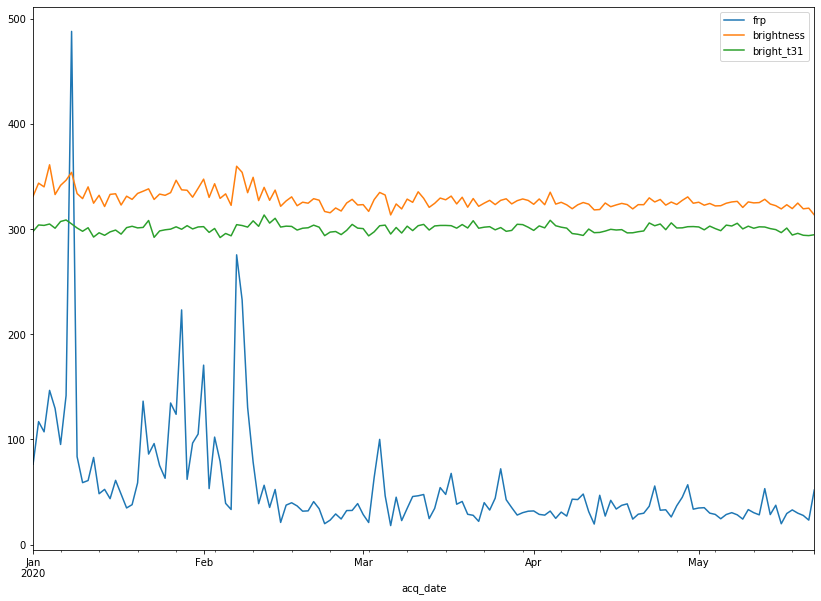

In [19]:
df.set_index('acq_date').plot(figsize = (14,10))

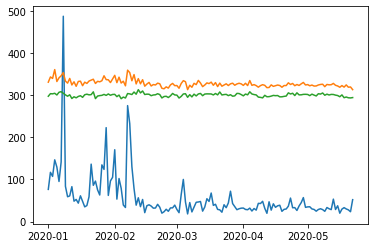

In [21]:
plt.plot(df.set_index('acq_date'))

In [ ]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])
dfm6 = m6.groupby([pd.Grouper(key='acq_date', freq='D')])[['frp','brightness', 'bright_t31']].mean().reset_index().sort_values('acq_date')

In [ ]:
dfm6.set_index('acq_date').plot(figsize = (14,10))

In [ ]:
plt.plot(dfm6.set_index('acq_date'))

### Questions: ###


| Project Fires From Space                                | Status            |
|---------------------------------------------------------|-------------------|
|  Karten                                                 |    completed      |
|                                                         |                   |
|  welche ist die heißeste Woche?                         |                   |  
|  Vergleich Nasa Data (mat) und                          |                   |
|  kaggle Data                                            |                   |
|                                                         |                   |
|wie viele Ereignisse pro woche-                          |                   |
|  feuerausbrüche, ort , dauer,                           |                   |
|   ausbreitung                                           |                   |
|                                                         |                   |
|wo (Ort) häufen sich feuer und in                        |                   |
|welchen monaten sofern feststellbar.                     |                   |
|                                                         |                   |
|korrelatíon mit windrichtung gegeben?                    |                   |
|                                                         |                   |
|Density Plot/Contour Plot                                |                   |
|                                                         |                   |
| Temperaturgradient                                      |                   |
|                                                         |                   |
| Ändern sich die Daten im Vergleich                      |                   |
| zu den NRT Daten - globale Korrelation                  |                   |
|                                                         |                   |
| Regressionsmodell - was soll vorausgesagt               |                   |
| werden?                                                 |                   |
|                                                         |                   |
| verzeichnen der naturschutzgebiete? -                   |                   |
| gefahr der zuspäten erkennung                           |                   |
|                                                         |                   |
| feststellung von möglich Evakuierungszonen auf          |                   |
| grund von feuerhäufigkeiten bzw                         |                   |
| machinelearning modell                                  |                   |
|                                                         |                   |
| entfernung feuerwache                                   |                   |
|                                                         |                   |
| weche zonen sind unüberwacht bzw kann anhand            |                   |
| der daten festellt werden ob bestimmte gebiete          |                   |
| erst recht spät bekannt werden. - feuerdauer            |                   |
| - löschzeitpunkt                                        |                   |
|                                                         |                   |
| ortsgebundene korellationsmatrix                        |                   |
|                                                         |                   |
| clustering                                              |                   |
|                                                         |                   |
| welche ist die heißeste Woche?                          |                   |
| Vergleich Nasa Data und kaggle Data                     |                   |
|                                                         |                   |
| wie viele Ereignisse pro woche- feuerausbrüche,         |                   |
| ort , dauer, ausbreitung                                |                   |
|                                                         |                   |  
| wo häufen sich feuer und in welchen monaten             |                   |
| sofern feststellbar.                                    |                   |
|                                                         |                   |  
| korrelatíon mit windrichtung gegeben?                   |                   |    
|                                                         |                   |  
| Density Plot/Contour Plot                               |                   | 
|                                                         |                   |    
| Temperaturgradient                                      |                   | 
|                                                         |                   |   
| Ändern sich die Daten im Vergleich zu den NRT           |                   |   
| Daten - globale Korrelation                             |                   |       
|                                                         |                   |       
| Regressionsmodell - was soll vorausgesagt               |                   |    
| werden?                                                 |                   |    
|                                                         |                   |    
| verzeichnen der naturschutzgebiete? -                   |                   |     
|gefahr der zuspäten erkennung                            |                   |     
|                                                         |                   |       
|                                                         |                   |   
|machinelearning modelle - welche sind mögl.              |                   |  
|                                                         |                   |   
|punktabfrage über karten                                 |                   |   
|                                                         |                   |   
|layerswitch, nationalparks einzeichnen                   |                   |  
|                                                         |                   |   
|predict nrt from archive data + confidenceprediction?    |                   |  
|                                                         |                   |   
|zeitlich aktive karten, windrichtung, feuer, frp         |                   |  
|                                                         |                   |   
|Sensorenvergleich confidence                             |                   |  
|                                                         |                   |   
|cloudmap                                                 |                   |  
|                                                         |                   |   
|verlauf in jahreszeiten (mon. X - mon Y = winter usw.)   |                   |  
|                                                         |                   |   
|vegetationszonen                                         |                   |  
|                                                         |                   |   
|1x week0/acq_time                                        |                   |  
|                                                         |                   |   
| set acq to datetime                                     |                   |  
|                                                         |                   |   
|ausbreitung der feuer, koordinaten||norm|| & brenndauer  |                   |
|                                                         |                   |   
|welches material verbrennt: wolken?, Co menge, Ort, frp  |                   |  
|                                                         |                   |   
|                                                         |                   |  
|                                                         |                   |   
|                                                         |                   |  

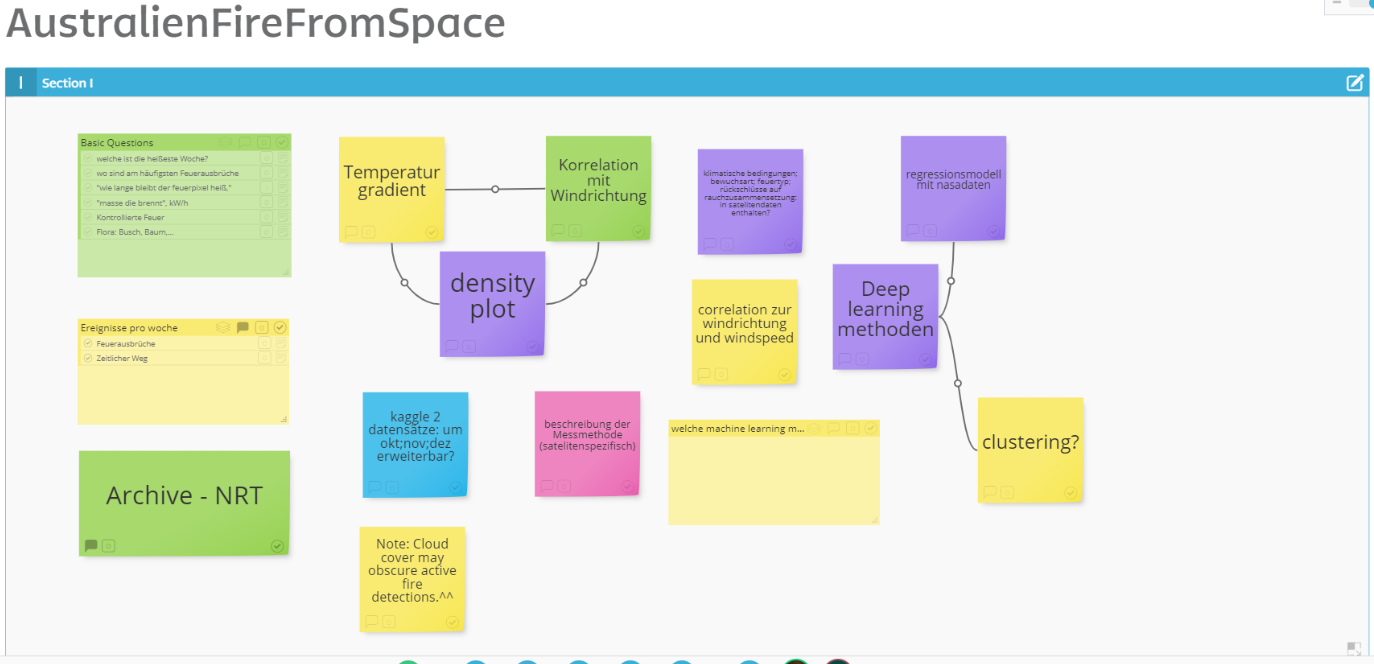